# 6. Check department 23-00089 city

The city being guessed for this department is wrong. Let's take a look at the alternatives.

In [1]:
from cpe_help import Department, util
from cpe_help.tiger import get_tiger

In [4]:
dept = Department('23-00089')
tiger = get_tiger()

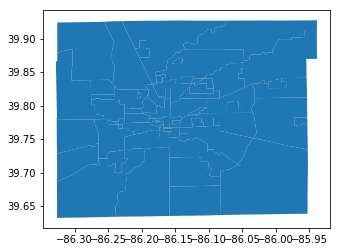

In [5]:
precincts = dept.load_police_precincts()
precincts.plot()

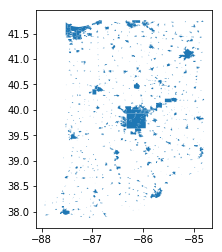

In [8]:
places = tiger.load_place_boundaries(dept.state.fips)
places.plot()

In [9]:
# find intersecting places

places = places[places.intersects(precincts.unary_union)]

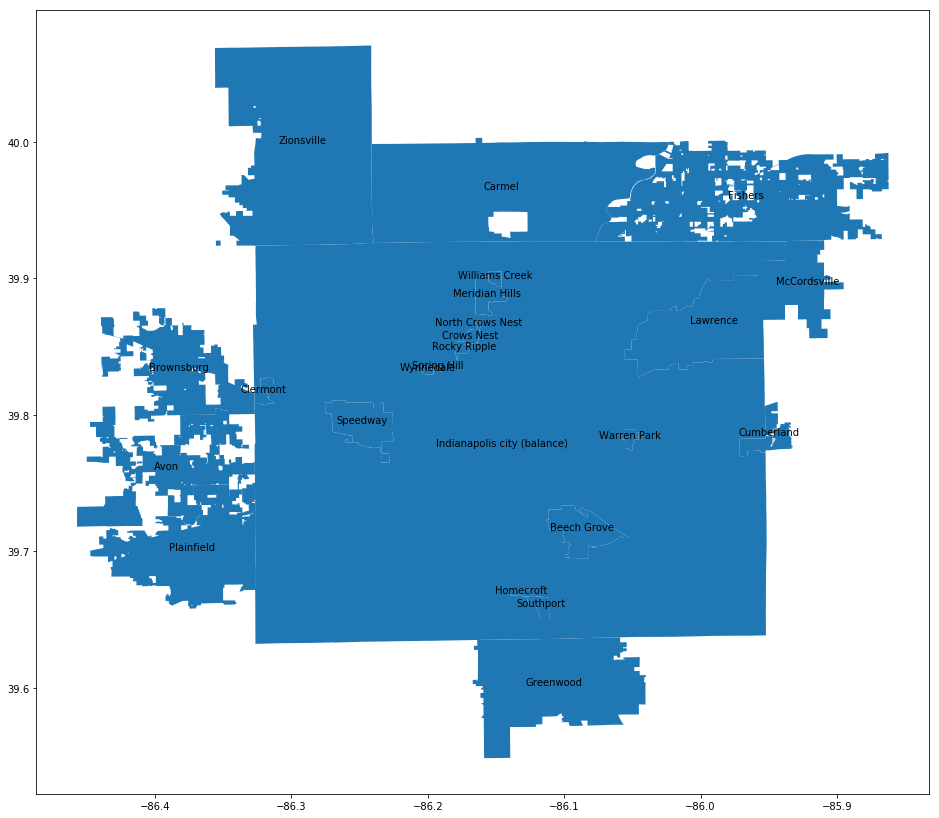

In [22]:
ax = places.plot(figsize=(16, 16))
places.apply(
    lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),
    axis=1
);

In [20]:
intersection = places.intersection(precincts.unary_union).area
places['INTS'] = intersection
places.sort_values('INTS', ascending=False)

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,INTS
37,18,36003,02395424,1836003,Indianapolis city (balance),Indianapolis city (balance),00,C8,Y,N,G4110,F,936287191,16893545,+39.7766644,-086.1459355,"POLYGON ((-86.328121 39.866125, -86.326925 39....",1.001718e-01
450,18,42426,02395647,1842426,Lawrence,Lawrence city,25,C1,N,N,G4110,A,52171457,276650,+39.8659565,-085.9896462,"POLYGON ((-86.055483 39.847319, -86.055494 39....",5.514602e-03
34,18,71828,02397670,1871828,Speedway,Speedway town,43,C1,N,N,G4110,A,12322287,9152,+39.7936983,-086.2475418,"POLYGON ((-86.27528599999999 39.809278, -86.27...",1.296706e-03
123,18,04204,02394106,1804204,Beech Grove,Beech Grove city,25,C1,N,N,G4110,A,11382105,0,+39.7153350,-086.0869644,"POLYGON ((-86.11311099999999 39.723144, -86.11...",1.195540e-03
30,18,48456,02396752,1848456,Meridian Hills,Meridian Hills town,43,C1,N,N,G4110,A,3820141,0,+39.8873632,-086.1567363,"POLYGON ((-86.165058 39.899772, -86.163961 39....",4.022443e-04
124,18,16336,02396672,1816336,Cumberland,Cumberland town,43,C1,N,N,G4110,A,6162539,24768,+39.7887485,-085.9498741,"(POLYGON ((-85.952895 39.80649, -85.949923 39....",1.941715e-04
58,18,13492,02396654,1813492,Clermont,Clermont town,43,C1,N,N,G4110,A,1739353,0,+39.8165494,-086.3206463,"POLYGON ((-86.32722699999999 39.81971, -86.322...",1.829045e-04
33,18,71486,02395920,1871486,Southport,Southport city,25,C1,N,N,G4110,A,1627043,0,+39.6599860,-086.1171148,"POLYGON ((-86.127669 39.666462, -86.125663 39....",1.707652e-04
35,18,80234,02397724,1880234,Warren Park,Warren Park town,43,C1,N,N,G4110,A,1164235,0,+39.7831936,-086.0517140,"POLYGON ((-86.05757299999999 39.789014, -86.05...",1.224063e-04
29,18,16156,02396670,1816156,Crows Nest,Crows Nest town,43,C1,N,N,G4110,A,1111854,0,+39.8564809,-086.1690638,"POLYGON ((-86.178602 39.853877, -86.172905 39....",1.170218e-04


The issue that happened is that the algorithm only tried identifying places where the FUNCSTAT is A. Now, Indianopolis is a unique snowflake and the Census provided different divisions.

I will leave this trouble to CPE... Just switch the 'A' filter to an 'A' and 'F filter!

ref:

- https://www.census.gov/geo/reference/funcstat.html
- https://en.wikipedia.org/wiki/Indianapolis#Demographics